In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems,  CairoMakie, GLMakie

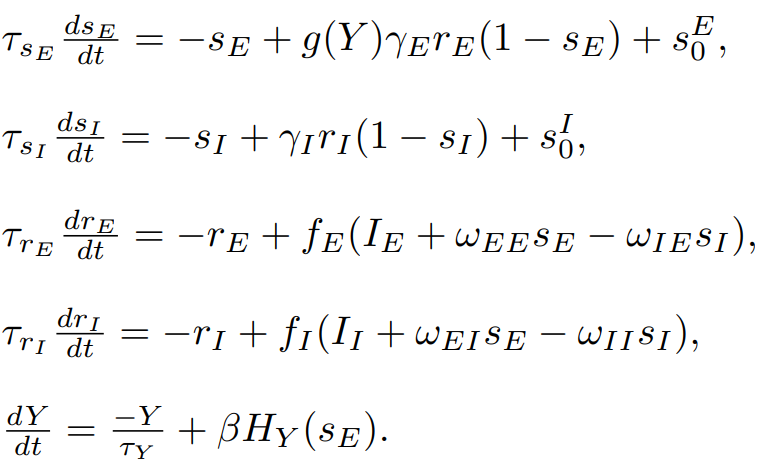

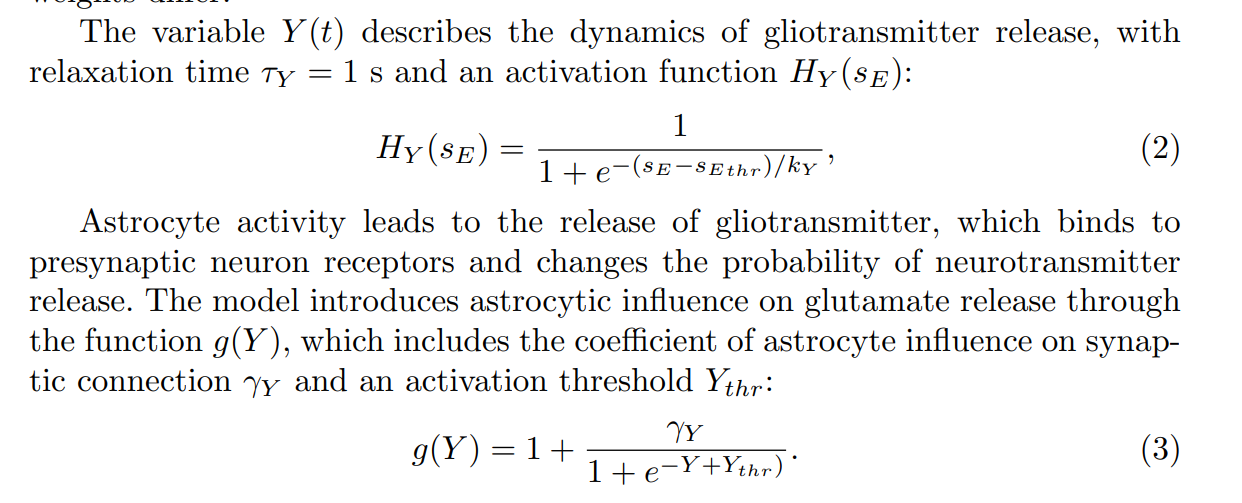

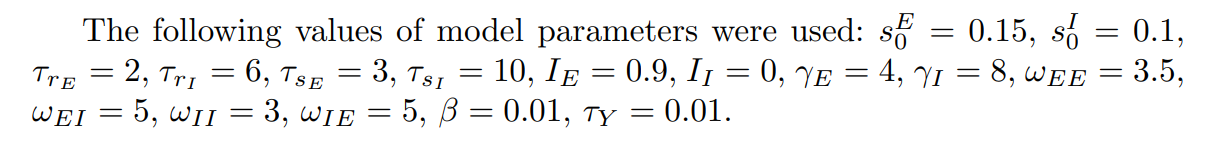

In [ ]:
function model_braint_rhythms(u, p, t)
    g(Y) = 1 + 1 / ( 1 + exp( -Y + Y_thr ) )

    s_E, s_I, r_E, r_i, Y = u # phase variables
    τsE, γE, s0E, τsI, γI, s0I  = p # parameters

    ds_E = (-s_E + g(Y) * γ_E * r_E * (1 - s_E) + s0E) / τsE
    ds_I = ( -s_I + γI * rI * ( 1 - s_I )+ s0I ) / τsI
    drE = ( -rE +  )

    